## Examen Módulo Machine Learning
### Segundo Intento: Diabetes Dataset
* Alumno: Bernardo Arturo Sosa Bagnoli
* Fecha: 23/11/2024 16:55pm

### Instrucciones para examen
Objetivo: Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.
### Contexto y Descripción del Dataset
El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

### IMPORTAMOS LAS LIBRERIAS QUE NECESITAMOS E INICIALIZAMOS EL DATASET

In [28]:
# Importar Librerias a utilizar 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Cargar el dataset
df = pd.read_csv('../data/examen_2/diabetes.csv')
print('(CantRow, CantColumn)')
print(df.shape)
print(df.columns)

(CantRow, CantColumn)
(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


### Limpieza de Datos
- Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [ ]:
# Identificar duplicados
duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

# Identificar valores nulos
nulos = df.isnull().sum()
print(f"Valores Nulos por columna:\n{nulos}")

# Verificamos los tipos de datos de las columnas
tipos_datos = df.info()
print(tipos_datos)





Registros duplicados: 0
Valores Nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome

### Exploracion de datos
- Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [ ]:
# Verificacion de los valores
describe = df.describe().T
print(describe)

# Analisis
corr = df.corr()
print(corr)

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

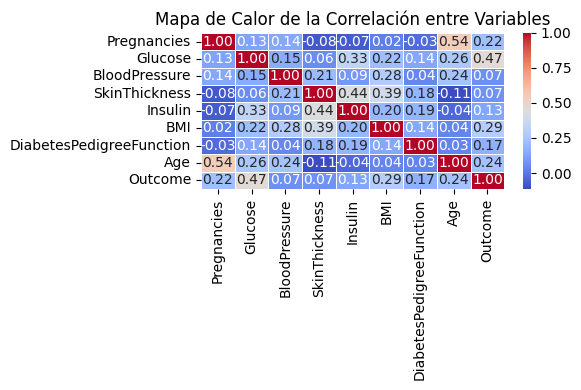

C:\Users\asosa\AppData\Local\Temp\ipykernel_16280\1531756185.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette=['g','r'])


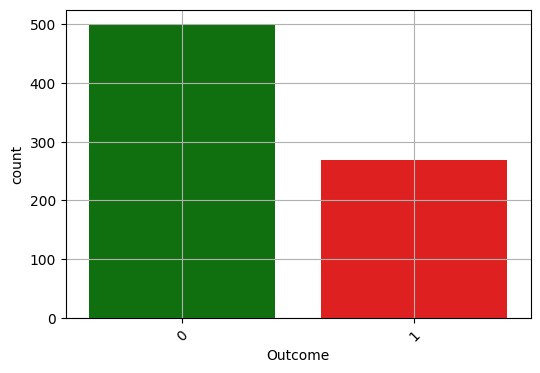

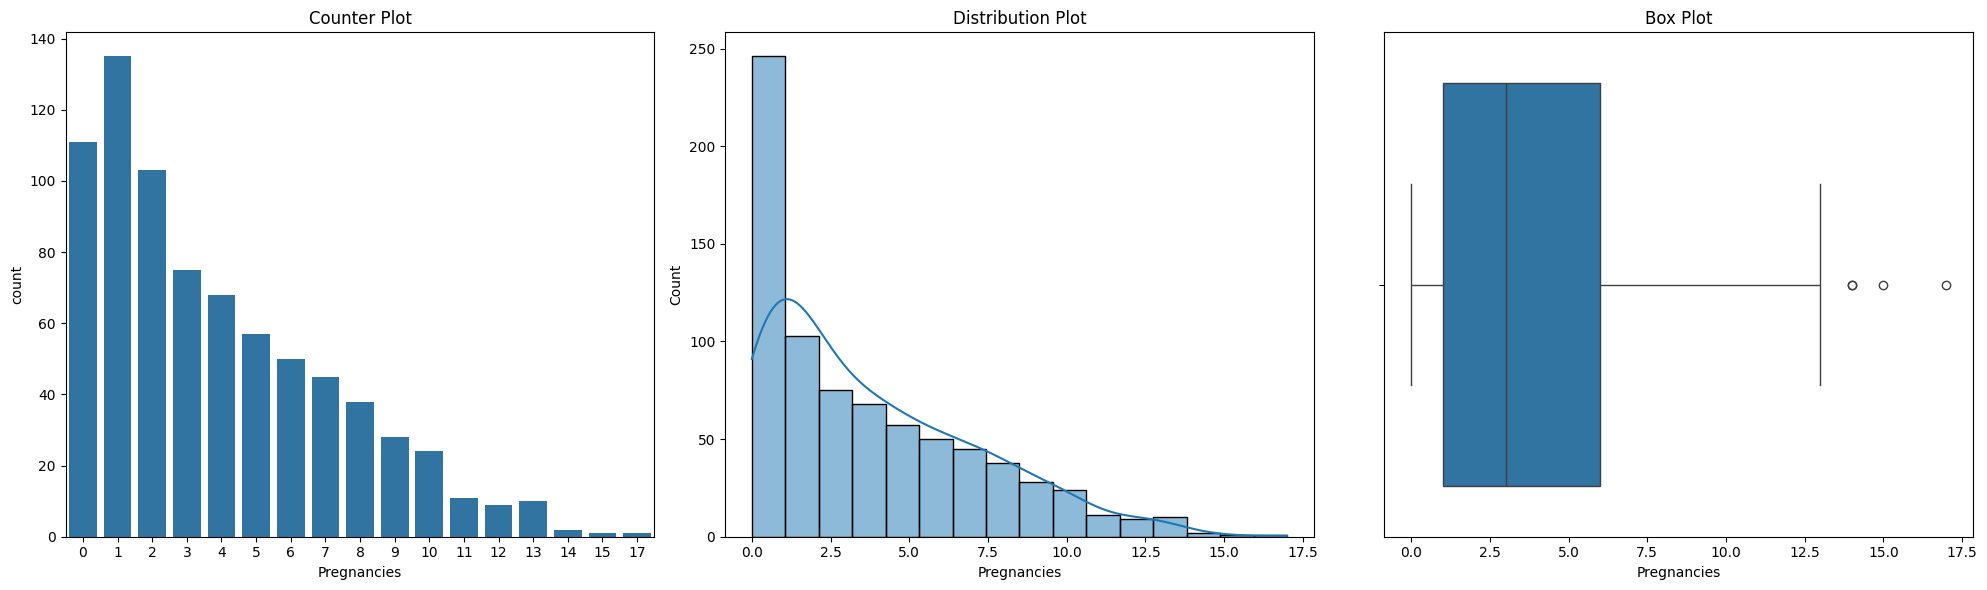

In [20]:
# GRAFICO DE CALOR
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome', palette=['g','r'])
plt.xticks(rotation=45)
plt.grid(True)

# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Create a 1x3 grid of subplots
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

# Counter Plot
ax1.set_title('Counter Plot')
sns.countplot(x='Pregnancies', data=df, ax=ax1)

# Distribution Plot
ax2.set_title('Distribution Plot')
sns.histplot(df["Pregnancies"], kde=True, ax=ax2)  # Use histplot instead of distplot

# Box Plot
ax3.set_title('Box Plot')
sns.boxplot(x='Pregnancies', data=df, ax=ax3)

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Implementacion de modelos
- Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
- Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
- Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [24]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=41)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


RandomForestClassifier(class_weight='balanced')
accuracy is :  0.7662337662337663 recall is :  0.7435897435897436 f1 is :  0.6170212765957447
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
accuracy is :  0.7727272727272727 recall is :  0.717391304347826 f1 is :  0.6534653465346535
    

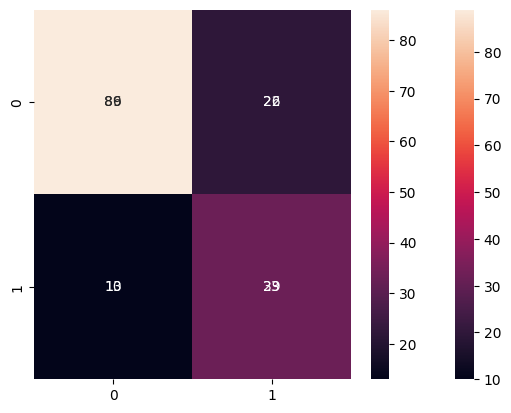

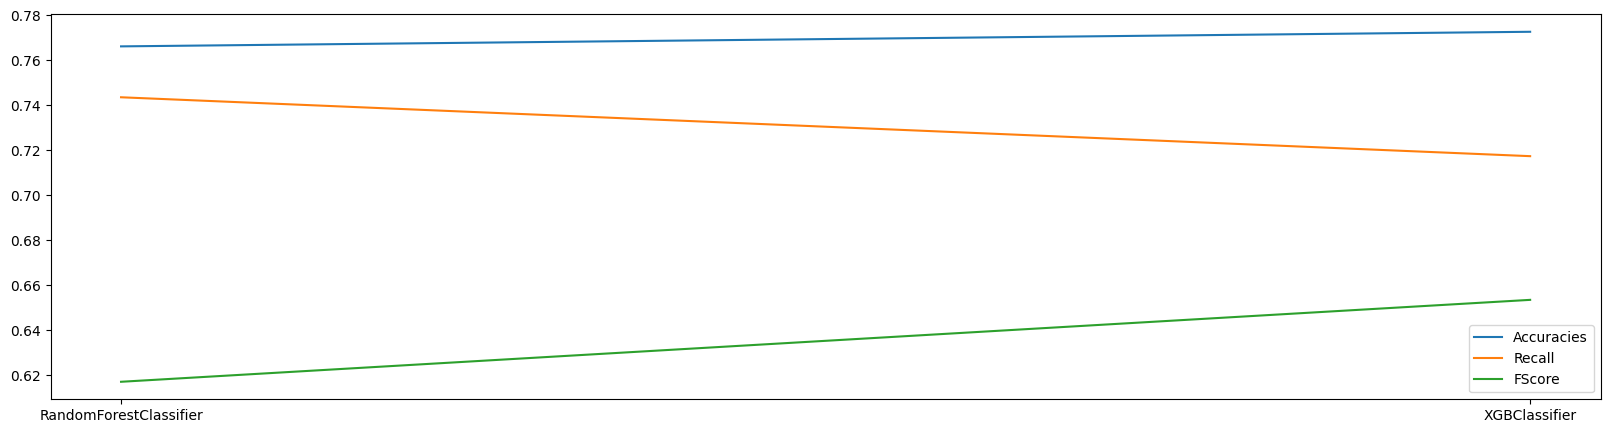

In [33]:
# Seleccionamos los modelos
models = [RandomForestClassifier(n_estimators=100,class_weight='balanced'), xgb.XGBClassifier(eval_metric='logloss', random_state=42)]

columns = ['RandomForestClassifier','XGBClassifier']
result1=[]
result2=[]
result3=[]

for i in range(2):
    models[i].fit(x_train, y_train)
    pre=models[i].predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(models[i])
    print('accuracy is : ',accuracy, 'recall is : ', recall, 'f1 is : ',f1)
    
ResultadoFinal= pd.DataFrame({'Algorithm':columns,'Accuracies':result1,'Recall':result2,'FScore':result3})
print(ResultadoFinal)

fig,ax=plt.subplots(figsize=(20,5))
plt.plot(ResultadoFinal.Algorithm,result1,label='Accuracies')
plt.plot(ResultadoFinal.Algorithm,result2,label='Recall')
plt.plot(ResultadoFinal.Algorithm,result3,label='FScore')
plt.legend()
plt.show()
